In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# read files

cols_char = ['Wikipedia_movie_ID',
'Freebase_movie_ID',
'Movie_release_date',
'Character_name',
'Actor_date_of_birth',
'Actor_gender',
'Actor_height_(in_meters)',
'Actor_ethnicity_(Freebase_ID)',
'Actor_name',
'Actor_age_at_movie_release',
'Freebase_character/actor_map_ID',
'Freebase_character_ID',
'Freebase_actor_ID',
]
df_char = pd.read_csv('data/character.metadata.tsv', sep='\t', names=cols_char)
print('Number of characters:', df_char.shape[0])

df_f_pageviews = pd.read_csv('female_actor_pageviews.tsv', sep='\t', encoding='utf-8')
df_m_pageviews = pd.read_csv('male_actor_pageviews.tsv', sep='\t', encoding='utf-8')

df_f_pageviews.head(3)

Number of characters: 450669


,Actor_name,Pageviews
0,Cesarine Prinz,NaN
1,A. J. Cook,1928194.0
2,A. J. Langer,440779.0


In [34]:
# split male and female dataframes and merge with pageviews

df_f_pre_merge = df_char[df_char['Actor_gender'] == 'F']
df_m_pre_merge = df_char[df_char['Actor_gender'] == 'M']

df_f = df_f_pre_merge.merge(df_f_pageviews, how='left', on='Actor_name')
df_m = df_m_pre_merge.merge(df_m_pageviews, how='left', on='Actor_name')

df_f.head()


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Pageviews
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,798244.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,1963262.0
2,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,1622924.0
3,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2873314.0
4,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,1038871.0


In [35]:
from datetime import datetime as dt

date_2017 = dt.strptime('2017-01-01', '%Y-%m-%d').date()
def calculate_diff(release_date):
    release_date = str(release_date)
    if release_date == "nan":
         return np.nan
    if len(release_date) == 10:
        release_date = dt.strptime(release_date, '%Y-%m-%d').date()
    elif len(release_date) == 7:
        release_date = dt.strptime(release_date, '%Y-%m').date()
    else:
        release_date = dt.strptime(release_date, '%Y').date()
    dif = (date_2017 - release_date).days
    if dif > 50000:
        return np.nan
    return dif

df_f['Time_since_2017'] = df_f.apply(lambda x: calculate_diff(x.Movie_release_date), axis=1)
df_m['Time_since_2017'] = df_m.apply(lambda x: calculate_diff(x.Movie_release_date), axis=1)

df_f.head(20)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Pageviews,Time_since_2017
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,798244.0,5609.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,1963262.0,5609.0
2,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,1622924.0,5609.0
3,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2873314.0,5609.0
4,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,1038871.0,5609.0
5,975900,/m/03vyhn,2001-08-24,NaN,1943-07-06,F,NaN,NaN,Rosemary Forsyth,58.0,/m/0cg7d4h,NaN,/m/03wc_yl,216496.0,5609.0
6,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm,16910.0,6164.0
7,3196793,/m/08yl5d,2000-02-16,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb,14213.0,6164.0
8,3196793,/m/08yl5d,2000-02-16,Patsy Ramsey,1964-07-12,F,1.630,NaN,Judi Evans,35.0,/m/0lr37g2,/m/0lr3z8p,/m/034c1p,113758.0,6164.0
9,3196793,/m/08yl5d,2000-02-16,JonBenet Ramsey,1994,F,NaN,NaN,Julia Granstrom,6.0,/m/0lr37ds,/m/0lr3z87,/m/08w75d,NaN,6164.0


In [50]:
df_f_timesincelastfilm = df_f.groupby('Actor_name')['Time_since_2017'].min()
df_f_pageviews['Time_since_last_film'] = df_f_pageviews['Actor_name'].map(df_f_timesincelastfilm)

df_m_timesincelastfilm = df_m.groupby('Actor_name')['Time_since_2017'].min()
df_m_pageviews['Time_since_last_film'] = df_m_pageviews['Actor_name'].map(df_m_timesincelastfilm)

Text(0.5, 1.0, 'Popularity of actors and actresses according to the time elapsed since their last movie until 2017')

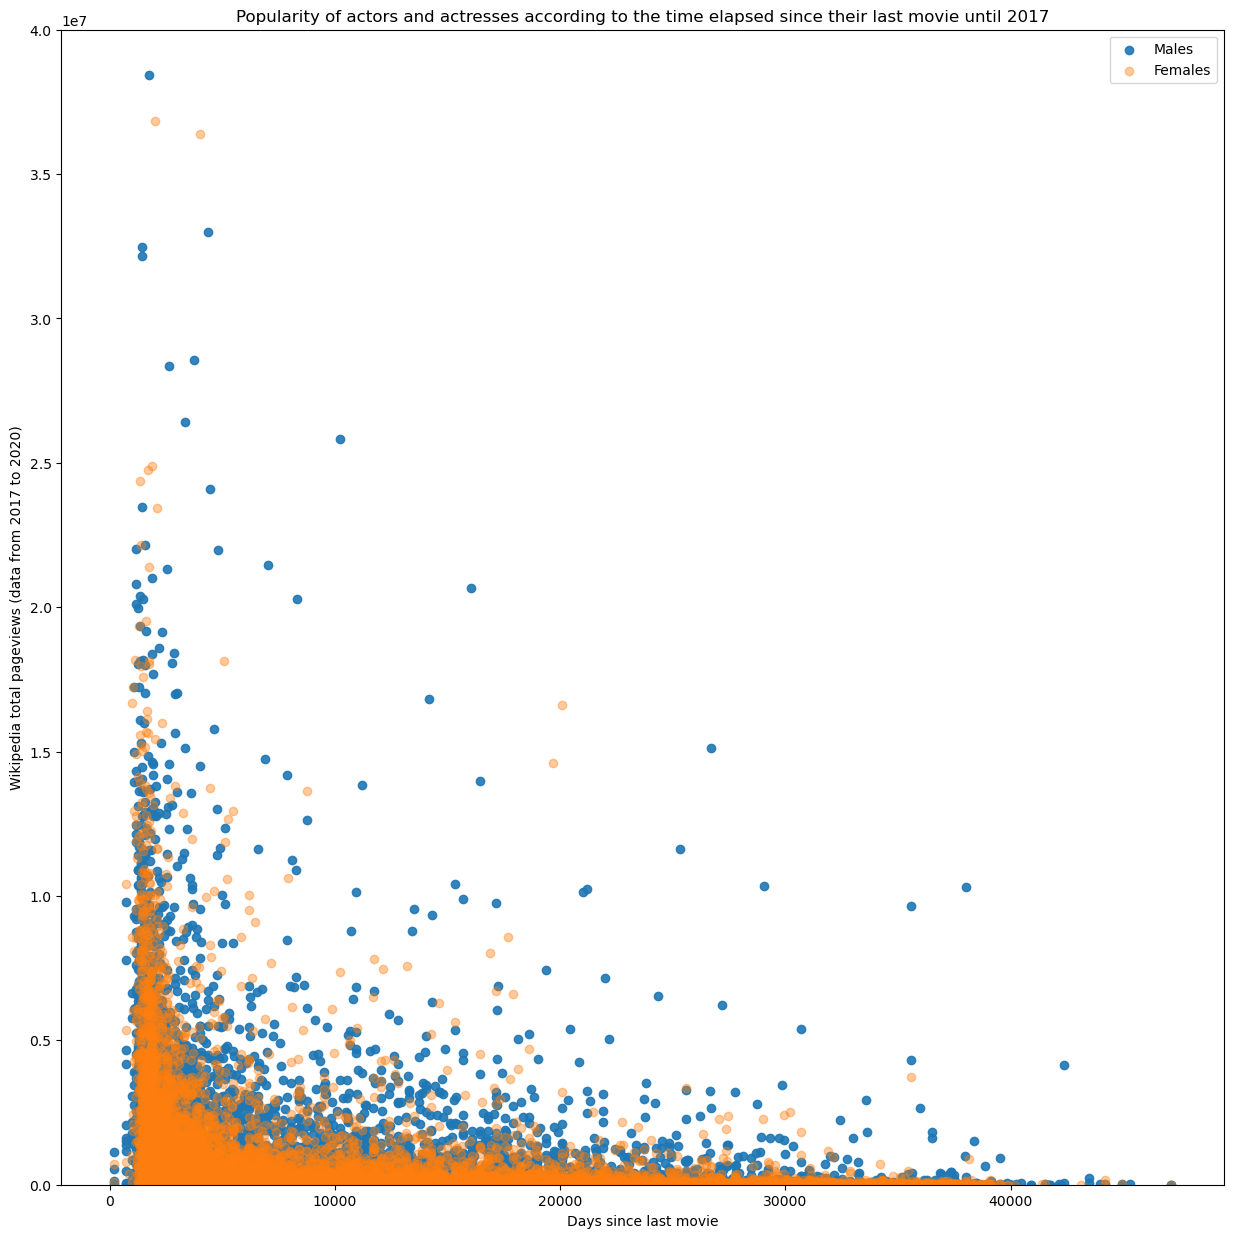

In [69]:
plt.rcParams["figure.figsize"] = (15,15)

plt.scatter(df_m_pageviews['Time_since_last_film'], df_m_pageviews['Pageviews'], alpha=0.9)
plt.scatter(df_f_pageviews['Time_since_last_film'], df_f_pageviews['Pageviews'], alpha=0.4)

plt.legend(['Males', 'Females'])
plt.ylim(0, 0.4e8)
plt.xlabel('Days since last movie')
plt.ylabel('Wikipedia total pageviews (data from 2017 to 2020)')
plt.title('Popularity of actors and actresses according to the time elapsed since their last movie until 2017')


Text(0.5, 1.0, 'Popularity of actors and actresses according to the time elapsed since their last movie until 2017 (log-log)')

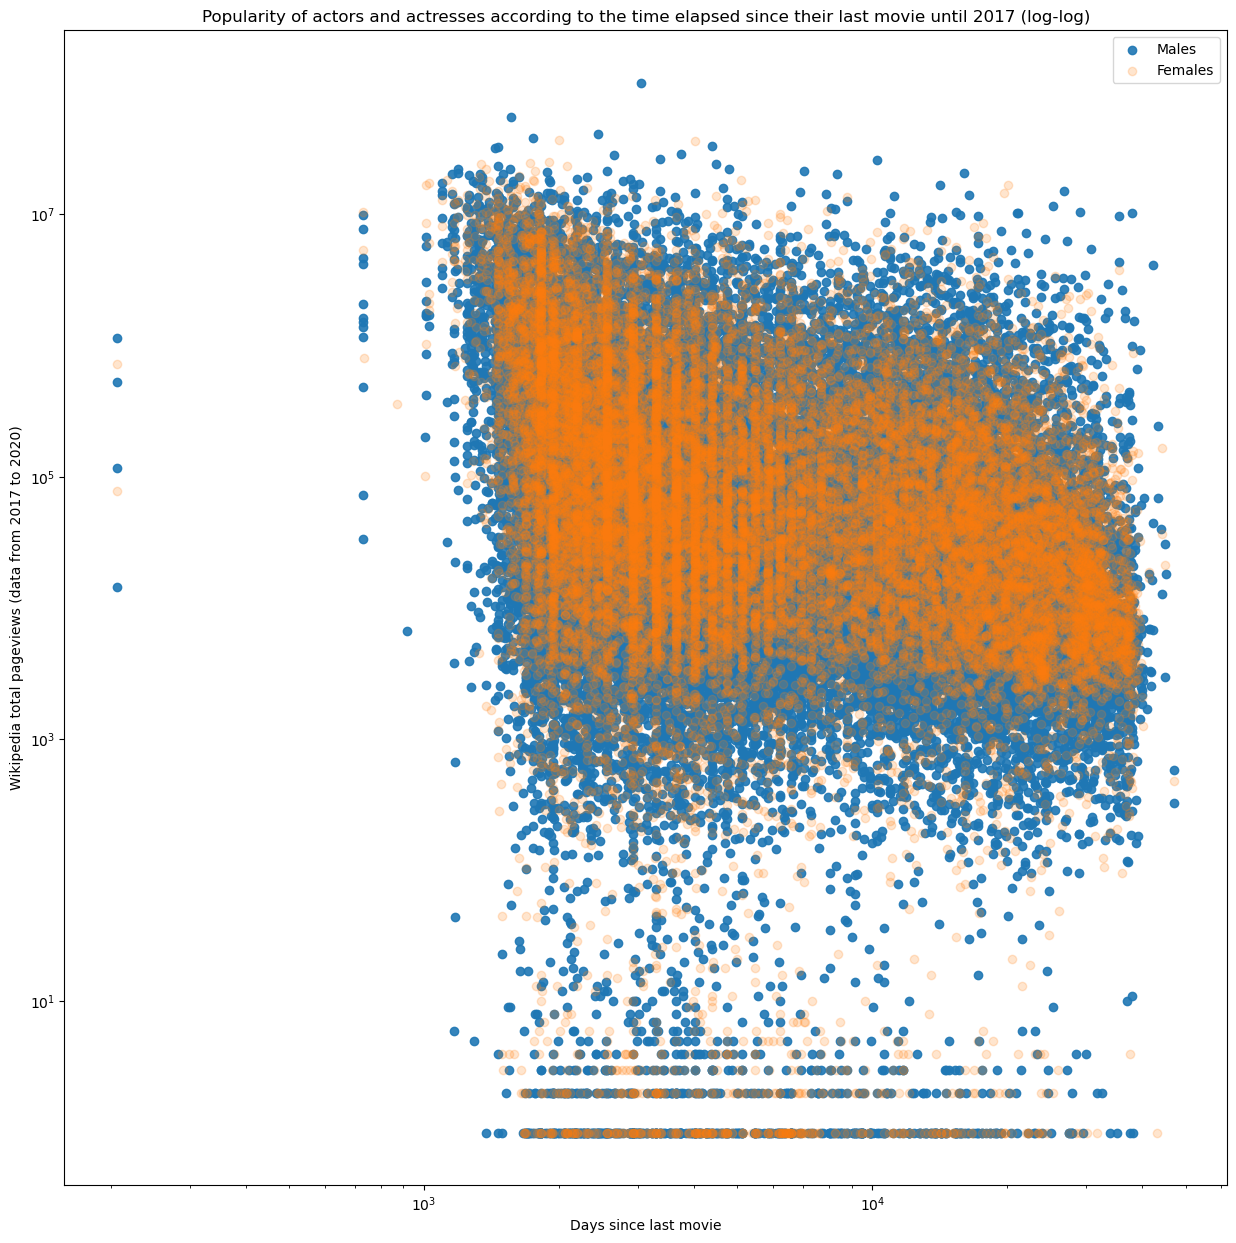

In [86]:
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.gca()

ax.scatter(df_m_pageviews['Time_since_last_film'], df_m_pageviews['Pageviews'], alpha=0.9)
ax.scatter(df_f_pageviews['Time_since_last_film'], df_f_pageviews['Pageviews'], alpha=0.2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Males', 'Females'])
plt.xlabel('Days since last movie')
plt.ylabel('Wikipedia total pageviews (data from 2017 to 2020)')
plt.title('Popularity of actors and actresses according to the time elapsed since their last movie until 2017 (log-log)')


In [85]:
import statsmodels.formula.api as smf

df_f_pageviews['Actor_gender'] = 'F'
df_m_pageviews['Actor_gender'] = 'M'

df_pageviews_both = pd.concat([df_f_pageviews, df_m_pageviews])
df_pageviews_both['log_pageviews'] = df_pageviews_both['Pageviews'].apply(np.log)
df_pageviews_both['log_Time_since_last_film'] = df_pageviews_both['Time_since_last_film'].apply(np.log)
mod = smf.ols(formula='log_pageviews ~ log_Time_since_last_film + Actor_gender', data=df_pageviews_both)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          log_pageviews   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2139.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:32:52   Log-Likelihood:            -1.3646e+05
No. Observations:               58030   AIC:                         2.729e+05
Df Residuals:                   58027   BIC:                         2.729e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The R-squared is very low which means that our model is not capable of explaining the majority of the variance. However, our variables are still significant: we see a Prob(F-statistic) of 0, which means that it is not accurate that our variables' effect is 0. Additionally, the p-values of all our variables are 0.

The linear regression has been made over the log of the pageviews. We also applied a log to the input variable of the time since the last film. The actor gender is a categorical variable. We chose to perform linear regressiong in log-log because it makes sense that the distribution follows a power law, and power laws in log-log are straight lines, so we can perform linear regression on that. 